### Exploring Seaborn with Pokemon Dataset

* Seaborn is a high-level interface to Matplotlib
* Seaborn is useful in exploratory analysis
* Pokemon Dataset has combat stats data of 151 Pokemon

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns # for plotting and styling

# Import dataset 
'''
index_col = 0 -> index column is the first column of the dataset
encoding -> to avoid UnicodeDecodeError
'''
df = pd.read_csv('data/Pokemon_data.csv', index_col = 0, encoding = "ISO-8859-1")
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [49]:
# Resizing Matplotlib plots

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
# print ("Current size:", fig_size)

### Scatter plot

lmplot() fits and draws a regression line accross a scatter plot.

2 ways to plot using lmplot():
1. Pass the Series data of columns to axes arguments
2. Pass the dataframe to data argument and column names to x and y axes arguments  

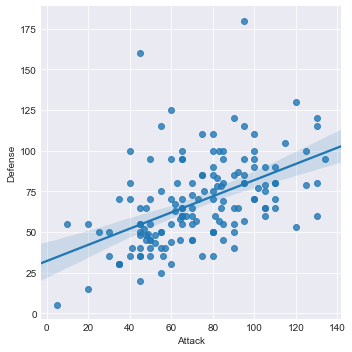

In [29]:
sns.set_style('darkgrid') # to set Seaborn plot theme - darkgrid & whitegrid

# Compare the Attack and Defense stats for our Pokémon

sns.lmplot(data=df, x='Attack', y='Defense');

# 2nd way
#sns.lmplot(x=df.Attack, y=df.Defense)

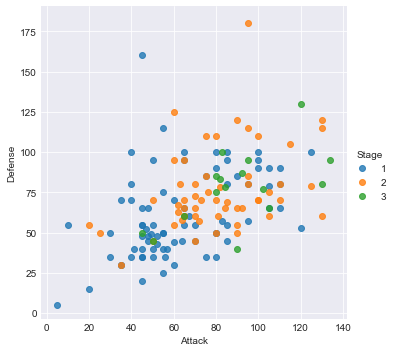

In [30]:
# Scatterplot arguments

sns.lmplot(data=df, x='Attack', y='Defense', 
           fit_reg=False, # To remove the line 
           hue='Stage'); # To introduce 3rd attribute-Stage (evolution) using color

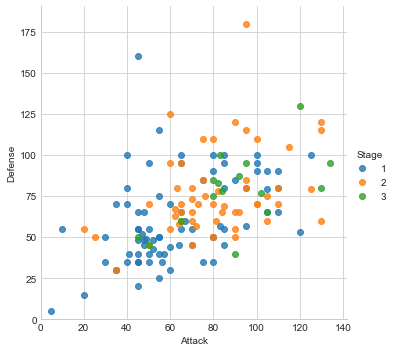

In [79]:
sns.lmplot(data=df, x='Attack', y='Defense', 
           fit_reg=False, # To remove the line 
           hue='Stage'); # To introduce 3rd attribute-Stage (evolution) using color

# Use matplotlib functions to define axes range starting from 0 (if negative already)

plt.xlim(0, None);
plt.ylim(0, None);

### Boxplot

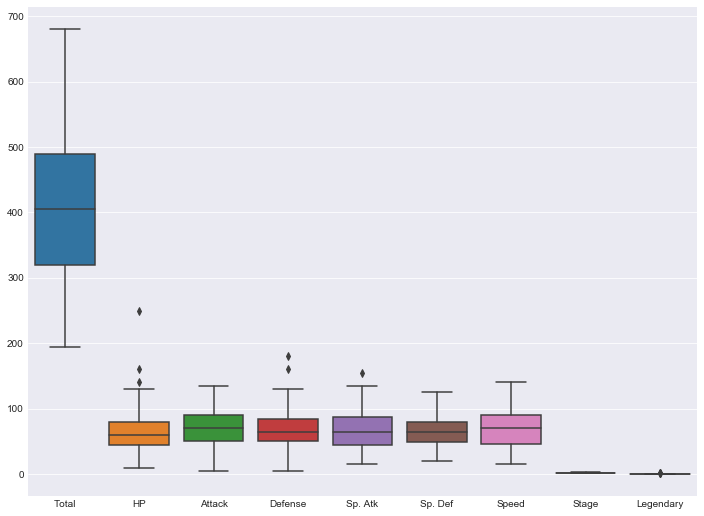

In [32]:
# Box plot for our Pokémon's combat stats

sns.boxplot(data=df);

In [33]:
# To plot without Total, stage and legendary columns

stats_df = df.drop(['Total','Stage','Legendary'], axis=1)
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


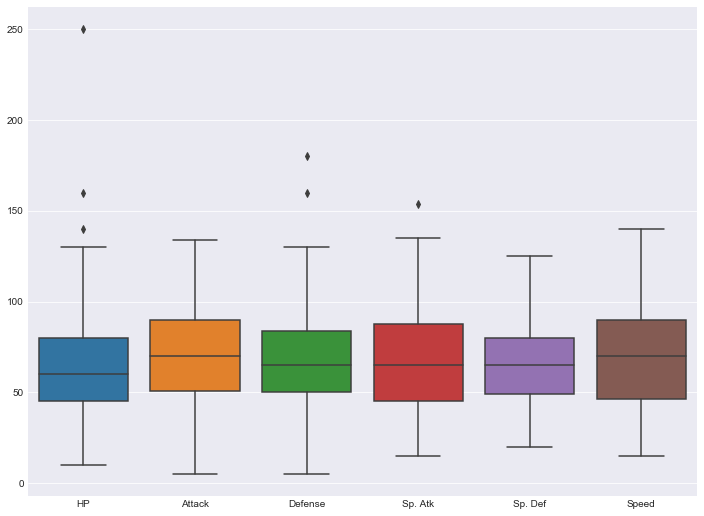

In [34]:
sns.boxplot(data=stats_df);

### Violin plots

* Violin plots are useful alternatives to box plots.
* They show the distribution (through the thickness of the violin) instead of only the summary statistics.

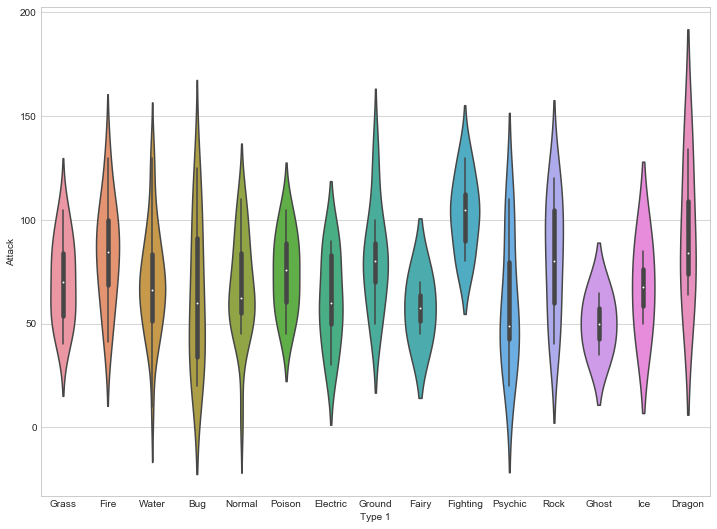

In [42]:
# Visualize the distribution of Attack by Pokémon's primary type

sns.set_style('whitegrid')

sns.violinplot(x='Type 1', y='Attack', data=df);

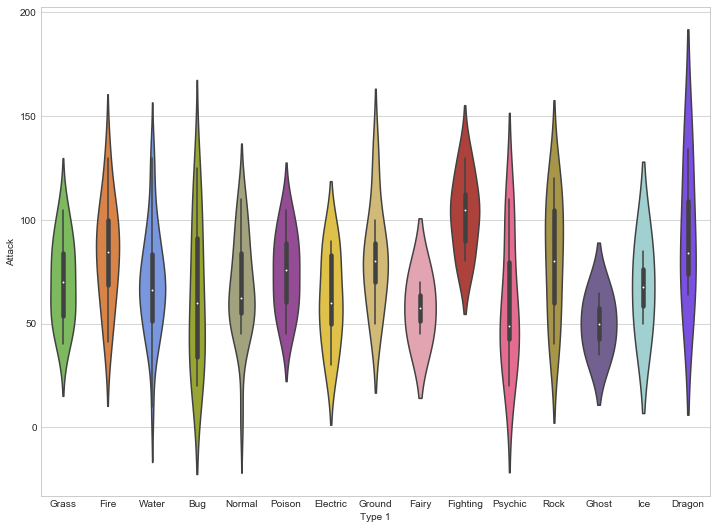

In [43]:
# Fixing the color codes of the above plot

pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

sns.violinplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors);

#### Swarm plot

This visualization will show each point, while "stacking" those with similar values

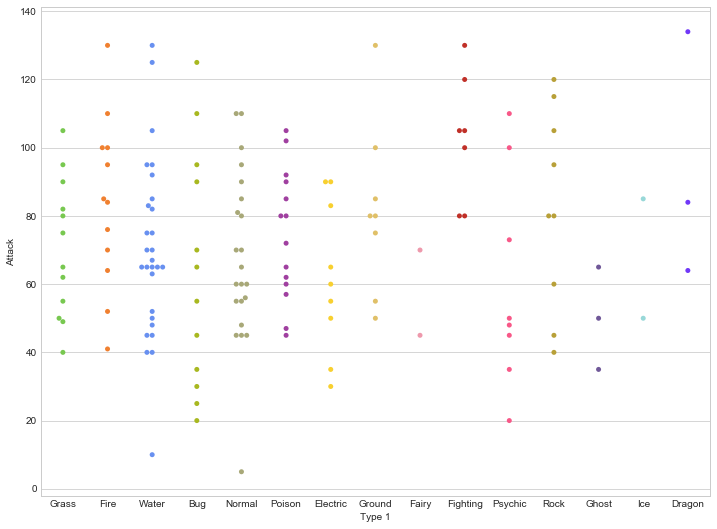

In [44]:
sns.swarmplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors);

### Overlay multiple plots

Overlay violin and swarm plot, as they display similar inforamtion

* Remove the bar inside the violin plot -> inner=None
* Plot swarm plot points with black color -> color='k' & light transparent -> alpha=0.7

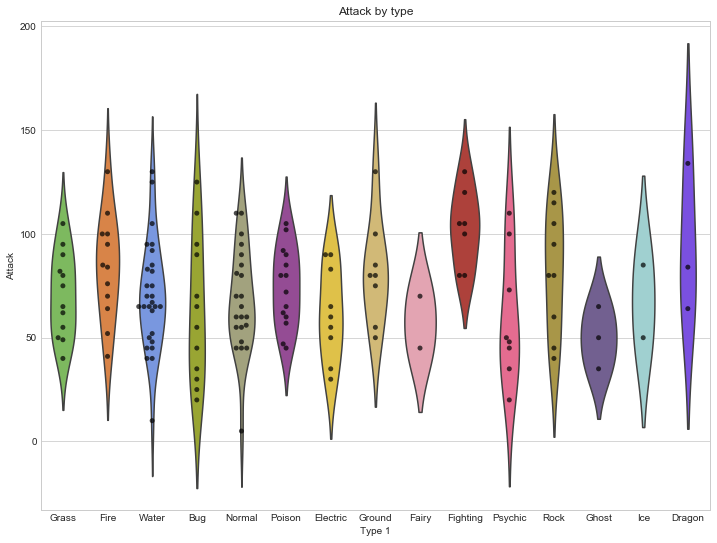

In [45]:
sns.violinplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors, inner=None);
sns.swarmplot(x='Type 1', y='Attack', data=df, color='k', alpha=0.7);

plt.title('Attack by type');

### Data Wrangling for easy visualization

* In order to easily visualize all the information in df, we will combine all the combat stats into 2 columns by 'Melting'/combining. 

* Use melt() function to do this data wrangling/ dataframe resizing

In [46]:
melt_df = pd.melt(stats_df, # Input df to be melted
                 id_vars=['Name','Type 1','Type 2'], # Columns to be retained/not melted
                 var_name='Stat') # Name for the new column formed from the melted columns

melt_df.head() # Each Pokemon name has 6 rows of stat: (HP, Attack, Defense, Sp. Attack, Sp. Defense, or Speed).

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


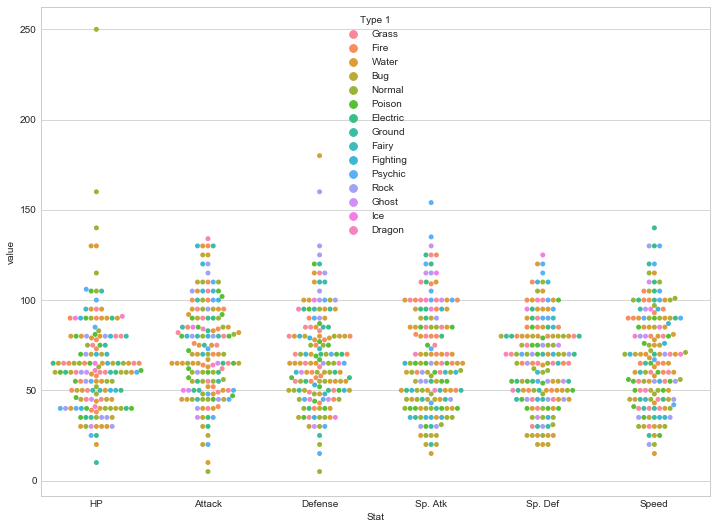

In [50]:
# Swarm plot: Swarms seperated by Stat, and Type 1 differetiated by color/hue

sns.swarmplot(x='Stat', y='value', data=melt_df, hue='Type 1');

Next Steps:
* Seperate the points by hue (dodge=True)
* Use our custom palette
* Make y axis end at 0
* Move legend to right

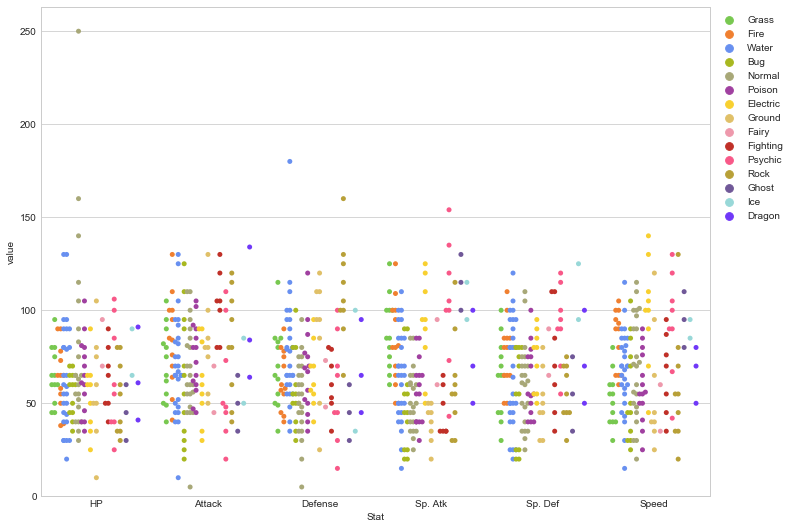

In [52]:
sns.swarmplot(x='Stat', y='value', data=melt_df, hue='Type 1', palette=pkmn_type_colors, dodge=True);

plt.ylim(0,None);
plt.legend(bbox_to_anchor=(1,1), loc=2);

#### Heat map 
* To visualize matrix like data

* These are the color themes for seaborn heatmaps:

    * sns.heatmap(df, cmap="YlGnBu")
    * sns.heatmap(df, cmap="Blues")
    * sns.heatmap(df, cmap="BuPu")
    * sns.heatmap(df, cmap="Greens")

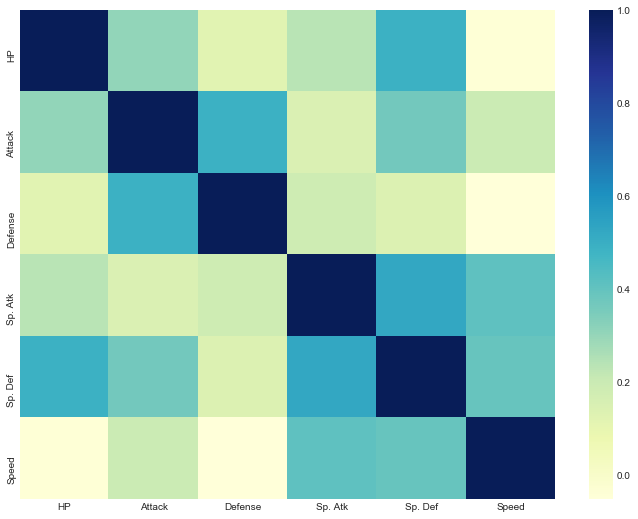

In [58]:
correlation = stats_df.corr()

sns.heatmap(correlation, cmap="YlGnBu");

#### Histogram

Histograms allow you to plot the distributions of numeric variables.

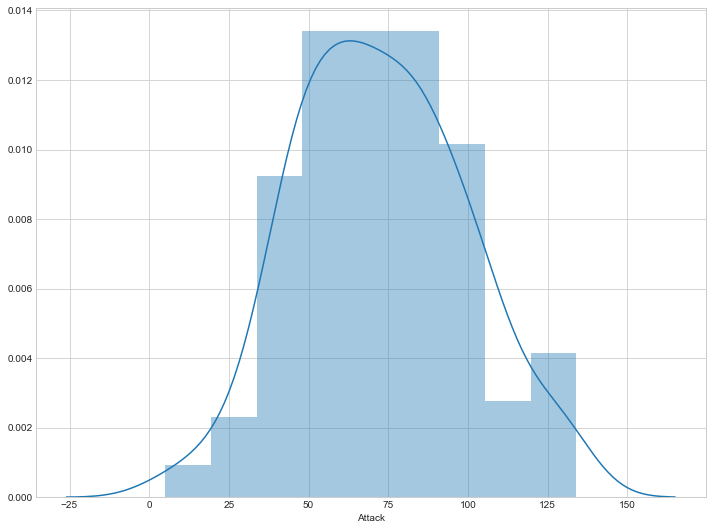

In [61]:
sns.distplot(df.Attack);

### Bar plot

Bar plots help you visualize the distributions of categorical variables.

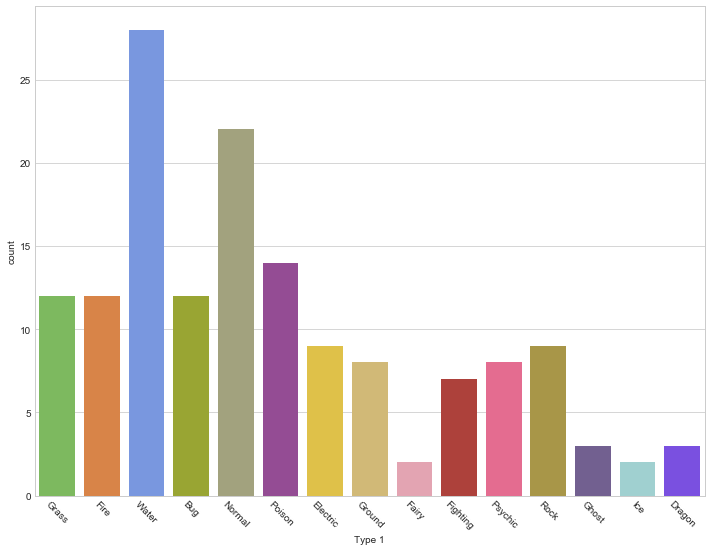

In [65]:
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors);

# Rotate x labels
plt.xticks(rotation=-45);

#### Factor plot

Factor plots make it easy to separate plots by categorical classes.

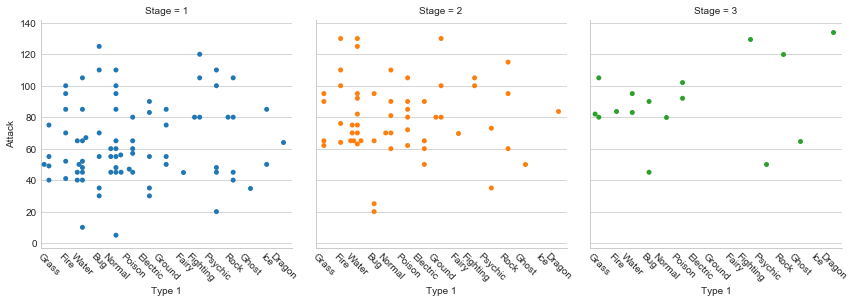

In [69]:
g = sns.factorplot(x='Type 1', y='Attack', data=df, 
                   hue='Stage', # Color by stage
                   col='Stage', # Seperate plot by stage
                   kind='swarm');

g.set_xticklabels(rotation=-45);

### Density plot

Density plots display the distribution between two variables.

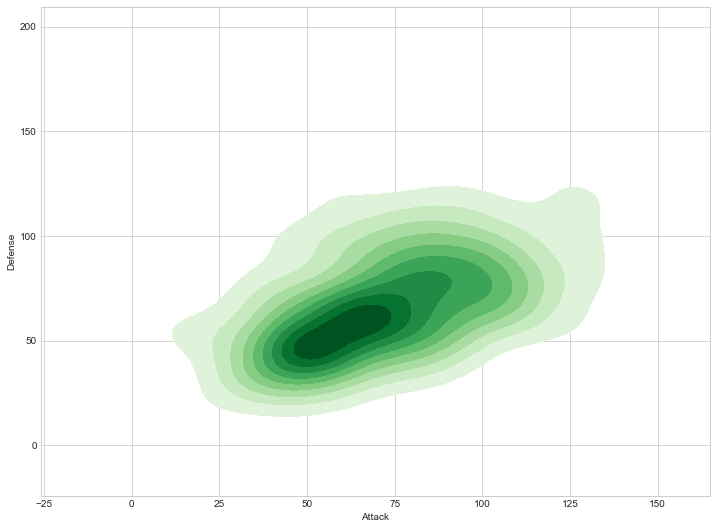

In [78]:
sns.kdeplot(df.Attack, df.Defense, cmap="Greens", shade=True, shade_lowest=False);

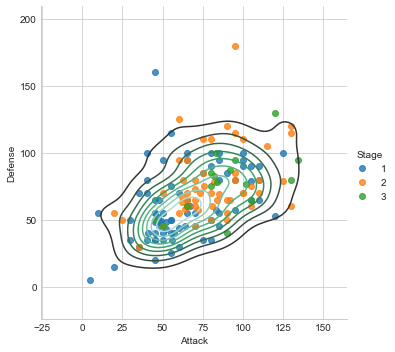

In [73]:
# Overlay scatter and density plot

sns.lmplot(data=df, x='Attack', y='Defense', fit_reg=False, hue='Stage');
sns.kdeplot(df.Attack, df.Defense);

### Joint distribution plot
Joint distribution plots combine information from scatter plots and histograms to give you detailed information for bi-variate distributions.

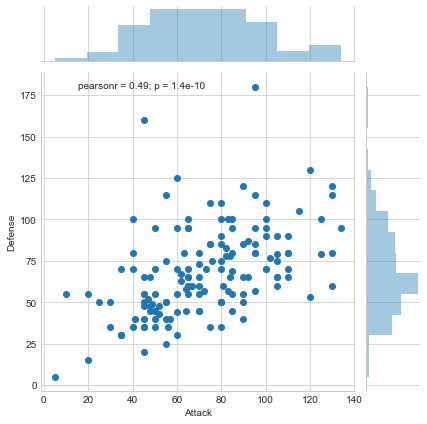

In [74]:
sns.jointplot(x='Attack', y='Defense', data=df);